# STAT 207 Project 02 - Video Games Dataset
BOYANG ZHAO, FINLEY MATTES, SARA DABBAGH

### Contribution Report

In this contribution report, you should list the following:

1. The netID for the project submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions of each team member to the report.

*For example:*

*<u>Teammates:</u>*

*doe105 should be graded.  John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*,

OR

*doe105 should be graded*

<i>1. Boyang Zhao (boyang7) completed parts 1 - 2</i>

<i>2. Sara Dabbagh (sdabb2) completed part 3</i>

<i>3. Finley Mattes (fmattes2) completed part 4</i>

<i>We reviewed the full document before submission.</i>

## 1. Introduction

### Research Title
A bit deeper research into the 'video_games.csv' dataset.
### Dataset Introduction
Originally collected and curated by Dr. Joe Cox, the 'video_games.csv' dataset contains information of video games from 2004 to 2008 and the features of the games including observable characteristics that may help estimate the likelihood of a video game becoming a block-buster title. For reference: https://corgis-edu.github.io/corgis/csv/video_games/
### Populations/Samples
Data in the 'video_games.csv' dataset represents sample, and our corresponding population of interest would be all video games released after 2000.
### Research Questions
1.What is the proportion of the video games in our dataset are rated by ESRB as 'M' for mature (recorded by the variable 'Release.Rating') ? What are a range of reasonable values for the proportion of all the video games that released after 2000 that are rated by ESRB as 'M' for mature? (We only care about whether the game is rated as 'M'.)

2.Is the mean time that players reported completing everything in the each of the game (recorded as the variable 'Length.Completionists.Average' in this dataset) of all video games released after 2000, in hours, higher than 24 hours?
### Contextual Importance
For question 1, this may provide us insights into the prevalence of adult-oriented content in modern gaming (all video games released after 2000), which may influence market trends, target demographics, and parental concerns regarding video game consumption.

For question 2, this may help us identify whether modern video games (all video games released after 2000) are designed to offer extensive content and engagement for players who aim to complete everything.




In [ ]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('video_games.csv', encoding = 'unicode-escape')

In [ ]:
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [ ]:
df.shape

(1212, 36)

## 2. Confidence Interval Analytical Tasks

### Our Research Question
What is the proportion of the video games in our dataset are rated by ESRB as 'M' for mature (recorded by the variable 'Release.Rating') ? What are a range of reasonable values for the proportion of all the video games that released after 2000 that are rated by ESRB as 'M' for mature? (We only care about whether the game is rated as 'M'.)




### Dataset Cleaning


In [ ]:
df['Release.Rating'].isna().sum()

np.int64(0)

In [ ]:
df['Release.Rating'].unique()

array(['E', 'M', 'T'], dtype=object)

Upon conducting the dataset cleaning process, we found that there is no na values or any unique values that do not match with our expected possible outcomes. Therefore, we decided to keep all observations.

### Descriptive Analytics

In [ ]:
#sample size
len(df)

1212

In [ ]:
#Numerical Summary
len(df[df['Release.Rating']=='M'])/len(df)

0.2070957095709571

Around 20.71% of games recorded in the 'video_games.csv' are rated by ESRB as 'M' for mature, and rest are not rated as for mature, and are either rated as for teen or for everyone

### Confidence Interval
i. Our confidence level is 90%

ii. simulation:

In [ ]:
sampling_dist = []
for i in range(10000):
  sample_df = df.sample(1212,replace=True)
  sampling_dist.append(len(sample_df[sample_df['Release.Rating']=='M'])/len(sample_df))
sampling_dist = pd.DataFrame({'x':sampling_dist})

array([[<Axes: title={'center': 'x'}>]], dtype=object)

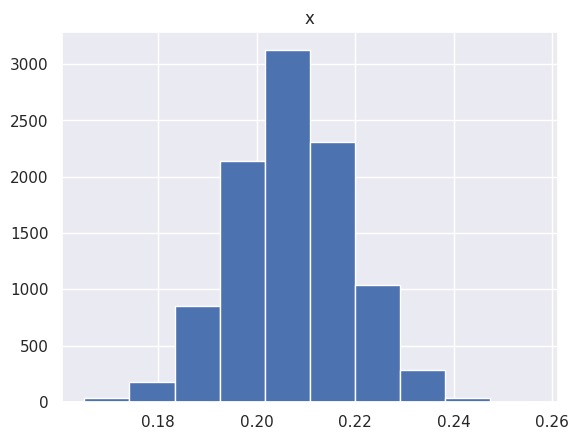

In [ ]:
sampling_dist.hist()

iii. Confidence Interval Estimation:

In [ ]:
#upper bound
print(sampling_dist['x'].quantile(0.95))

0.22607260726072606


In [ ]:
#lower bound
print(sampling_dist['x'].quantile(0.05))

0.18811881188118812


### Confidence Interval Interpretion
We are 90% confident that the population proportion (proportion of all video games after 2000) being rated by ESRB as 'M' for mature is contained in the interval (0.1881,0.2269)

## 3. Hypothesis Testing Analytical Tasks

### Research Question

What are the key summary measures (center, spread, and shape) of average completion times, and does the data suggest that most games are designed to be completed in under 24 hours, or that modern games are more likely to exceed 24 hours of completion time?

### Data Cleaning

In [ ]:
df["Length.Completionists.Average"].isnull().sum()

np.int64(0)

In [ ]:
df["Length.Completionists.Average"].describe()

,Length.Completionists.Average
count,1212.000000
mean,19.808223
std,46.634546
min,0.000000
25%,0.000000
50%,6.000000
75%,21.554167
max,683.133333


In [ ]:
print((df["Length.Completionists.Average"] == 0).sum())

542


Upon analyzing the numerical summary of my average completion time variable, I see that my minimum value is 0.0, which is unusual. It appears that there are 542 observations with this value recorded, likely meaning there are no average completion times recorded for these games. Thus, I will drop these observations so that I may accurately observe our variable of interest.

In [ ]:
cleaned_df = df[df["Length.Completionists.Average"] > 0]

### Descriptive analytics

In [ ]:
cleaned_df["Length.Completionists.Average"].describe()

,Length.Completionists.Average
count,670.000000
mean,35.832189
std,57.979987
min,0.500000
25%,10.816667
50%,18.891667
75%,39.954167
max,683.133333


My median for the average completion time variable is 18.891, and the mean is 35.832. I'm curious as to why these values are so different. We will investigate further using visualizations.

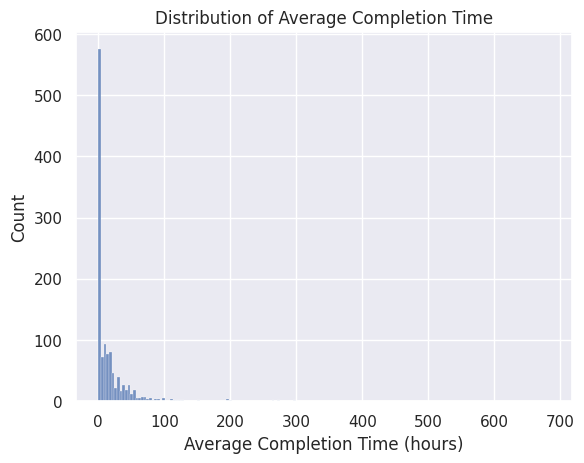

In [ ]:
sns.histplot(df["Length.Completionists.Average"])
plt.xlabel("Average Completion Time (hours)")
plt.title("Distribution of Average Completion Time")
plt.show()

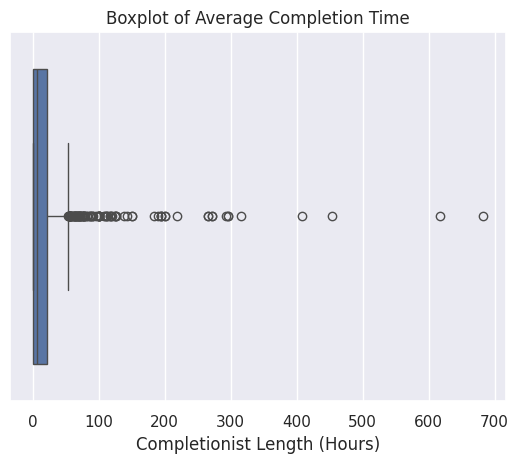

In [ ]:
sns.boxplot(x=df["Length.Completionists.Average"])
plt.xlabel("Completionist Length (Hours)")
plt.title("Boxplot of Average Completion Time")
plt.show()

My histogram demonstrates that there is a strong skew to the left, with most observations having a moderately low average completion time, as compared to my far right outliers. The graph extends to observations close to 700 hours, as confirmed by the maximum value seen in the numerical summary. This tells me that while most games have a relatively small completion time, there are a handful of outliers (games with respectively very large completion times.)

My boxplot confirms that we have a large number of outliers, as seen by the values that fall outside of the graph's whiskers. While the outliers that are under 150 hours aren't that concerning, I'm more concerned by the few observations that fall on the far right side of my boxplot. These could be affecting the mean, making the average completion time look much larger than what most players experience.

Both graphs and my numerical summary show that we have extreme outliers that could lead to a false conclusion regarding whether most games are to be completed in under or over 24 hours. These hint at the fact that perhaps the median should be analyzed for the center of our variable of interest, rather than the mean.

### Hypothesis Test
**Parameter of interest**:

μ = the true population median of average completion times in hours ("Length.Completionists.Average") for completionist playthroughs.

**Null Hypothesis**:

μ ≤ 24 (The median average completion time is less than or equal to 24 hours.)

**Alternative Hypothesis**:

μ > 24 (The median average completion time is greater than 24 hours.)


**Significance level**: We will be testing at a α = 0.05 significance level.

**Checking conditions for the test:**

Before conducting the hypothesis test, we need to check that key conditions are met, so that we know our results are valid. First, the dataset is considered representative of the larger population of video games, allowing us to generalize our findings. Second, completion times for each game are independent observations since game represents a distinct data point. So, we may proceed.

*Adopting skeptic's claim*

In [ ]:
cleaned_df['skeptic'] = cleaned_df["Length.Completionists.Average"] - cleaned_df["Length.Completionists.Average"].median() + 24
cleaned_df['skeptic']

<ipython-input-24-dcf203754c8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['skeptic'] = cleaned_df["Length.Completionists.Average"] - cleaned_df["Length.Completionists.Average"].median() + 24


,skeptic
0,34.875000
2,15.108333
4,77.675000
5,35.141667
6,6.358333
...,...
1204,10.158333
1206,18.241667
1207,17.158333
1210,17.158333


<Axes: ylabel='Frequency'>

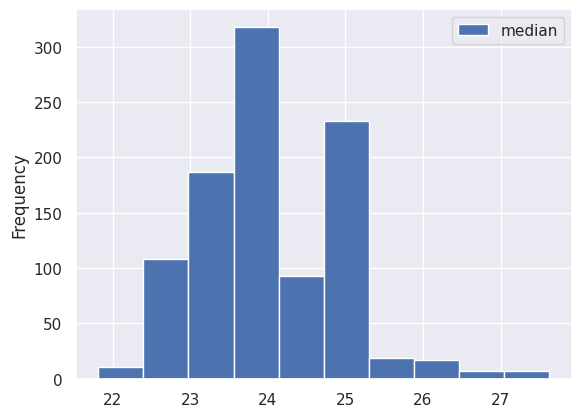

In [ ]:
n = len(cleaned_df)
sampling_dist  =[]
for i in range(1000):
    mysample = cleaned_df.sample(n, replace=True)
    sampling_dist.append(mysample["skeptic"].median())


sampling_dist =  pd.DataFrame({"median": sampling_dist})
sampling_dist.plot.hist()

In [ ]:
p_value = (sampling_dist["median"] <= 24).mean()
p_value

np.float64(0.524)

**Interpretation of Significance Level & P-value**

Significance level (α = 0.05):

There is a 5% risk of rejecting our null hypothesis when it is actually true (a Type I error).

P-value interpretation:

Our p-value of 0.514, which is much greater than our signicance level of α=0.05, suggests that there is insufficient evidence to suggest that the true median completion time is greater than 24 hours. Therefore, we fail to reject the null hypothesis.


## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

In [ ]:
df["Release.Year"].nsmallest(10)

,Release.Year
0,2004
1,2004
2,2004
3,2004
4,2004
5,2004
6,2004
7,2004
8,2004
9,2004


## 4. Conclusion

a. Our first research question was: What is the proportion of the video games in our dataset are rated by ESRB as 'M' for mature, and what is a range of reasonable values for the proportion of all the video games that released after 2000 that are rated by ESRB as 'M' for mature? To answer this two-parted question, we first calculated the proportion of 'M' rated video games in our dataset, then decided to generate a 90% confidence interval based on a sampling distribution of our dataset. We returned the value range of (18.81%, 22.69%), indicating that we are 90% confident that the true population proportion of all video games released after 2000 rated 'M' is contained within the above interval.

Our second research question was: Is the mean time that players reported completing everything in the each of the game of all video games released after 2000, in hours, higher than 24 hours? To fully answer this question, we first cleaned the dataset, then observed summary measures such as shape, spread, and center. After deciding to use median as the measure of center for our research question, we adopted a sampling distribution to the null hypothesis, chose a significance value of 0.05, and returned a p-value of 0.514. Based on this result, we fail to reject the null hypothesis which states that median video game completion time is less than or equal to 24 hours.

b. In our data analysis, results, and interpretations, our group faced several limitations. The most significant limitation of our project was our data: a crowd-sourced dataset regarding video games released between 2000 and 2010. The dataset's crowd-sourced nature and out-of-date status limits the claims we can make from the dataset. We would prefer a larger sample including more current video games to draw more sweeping, broadly applicable results from our research. Additionally, we struggled in selecting a percentage for our confidence interval and a significance level for our hypothesis testing. We eventually chose values of 90% and 0.05 because they are commonly used in the data science world, but felt uncomfortable that our largely arbitrarily selected confidence interval and significance level could create a potentially meaningful difference in the results of our research.

c. If we were to conduct future work based on these analyses, we would formulate new research questions to reflect our recent findings. First, we would like to analyze a dataset containing the population of gamers collected between the years 2000 and 2010 to answer the question: What is the proportion of gamers in the gamer population who are 17 or older? We are curious to answer this question to observe whether the proportion of gamers who are 17+ aligns with the proportion of video games that are rated 'M'.

Additionally, in the future we would like to ask the research question Is the mean time that players reported completing everything in the each of the games, in hours, higher than 24 hours for all video games released between 2010 and 2020? We would like to answer this question so that we could draw comparisons between video game completion times released between 2000 and 2010 and games released more recently.